### EDA with Student Performance Indicator dataset-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset-
df= pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### Data checks to perform-
- check missing values
- check duplicates
- check data type of each feature
- check no. of unique values of each column
- check statistics of dataset
- check various categories present in different categorical column

In [6]:
# check for missing values-
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Insight/observation- 
- No null or missing values are present in any column

In [7]:
# check for duplicates-
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df.duplicated().sum()

0

#### Insight/observation-
- No duplicate records are present in the dataset

In [9]:
# check datatype of each feature-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# check no. of unique values-
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
# check the satistics of numerical columns of dataset-
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights/observations-
- From the above description of numerical data, all means are very close to each other- between 66-69.16
- All standard deviationa are also close- between 14.6-15.19
- While there is a minimum of 0 for maths, other are having 17 and 10 as min.
- Maximum is 100 for all 3 numerical columns

In [16]:
# segregate numerical and categorical features-
numerical_features= [ feature  for feature in df.columns if df[feature].dtype!= "O"]
numerical_features

['math_score', 'reading_score', 'writing_score']

In [17]:
categorical_features= [ feature for feature in df.columns if df[feature].dtype == "O"]
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [18]:
# create 2 new columns- total_score and average_score-
df["total_score"]= (df["math_score"]+df["reading_score"]+df["writing_score"])
df["average_score"]= df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


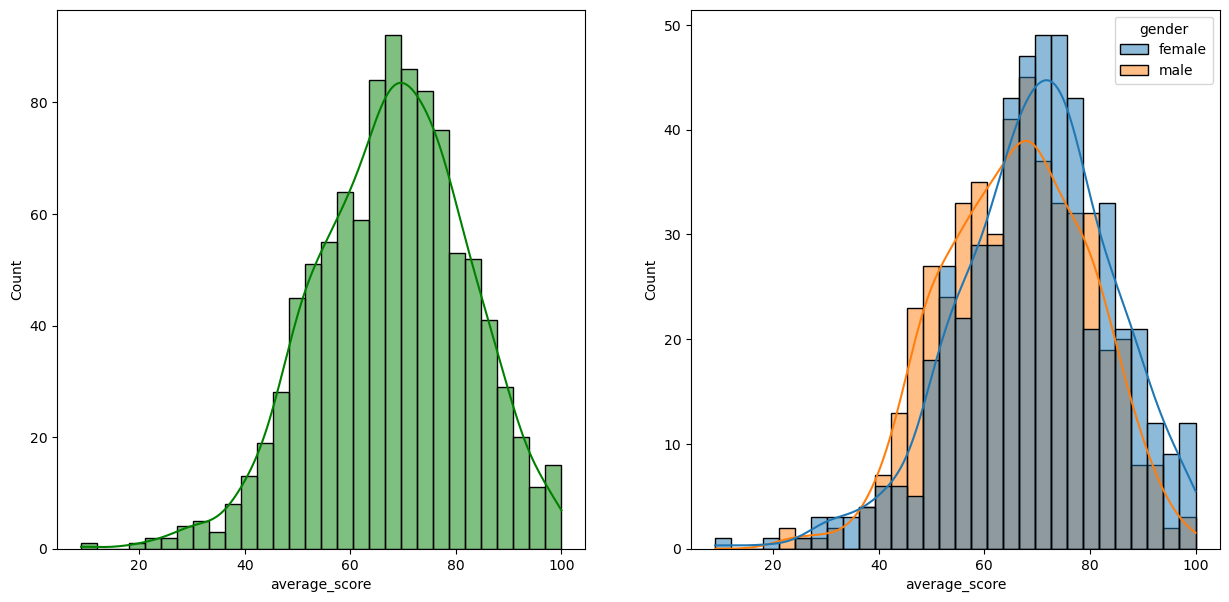

In [22]:
# explore more visualization-
fig,axis= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(x="average_score", data=df, kde=True, bins=30, color="g")
plt.subplot(122)
sns.histplot(x="average_score", data=df, kde=True, bins=30, hue="gender")
plt.show()

#### Insight/observation- 
- Female students tend to perform well than male students because the average score of females is higher than males

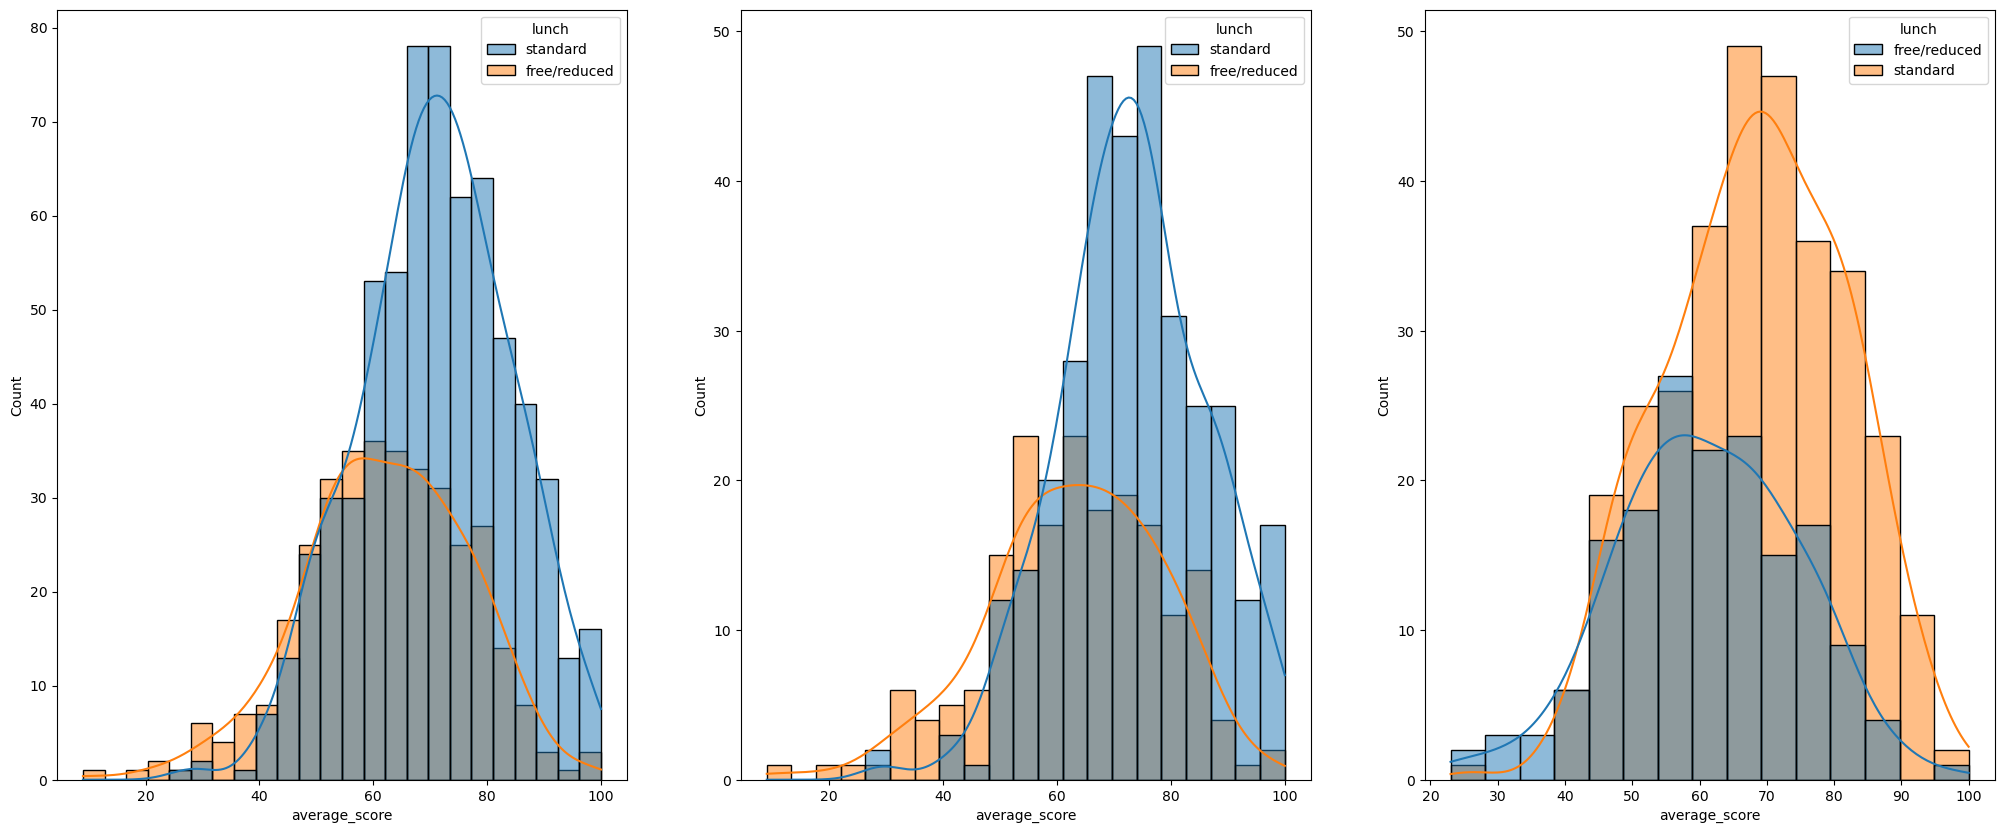

In [30]:
fig, axis= plt.subplots(1,3, figsize=(25,10))
plt.subplot(131)
sns.histplot(x="average_score", data=df, kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(x="average_score", data= df[df["gender"]=="female"], kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(x="average_score", data= df[df["gender"]=="male"], kde= True, hue="lunch")
plt.show()

#### Insights/observations-
- Standard lunch help students perform well in exams.
- Standard lunch helps to perform well in exams be it a male or a female.

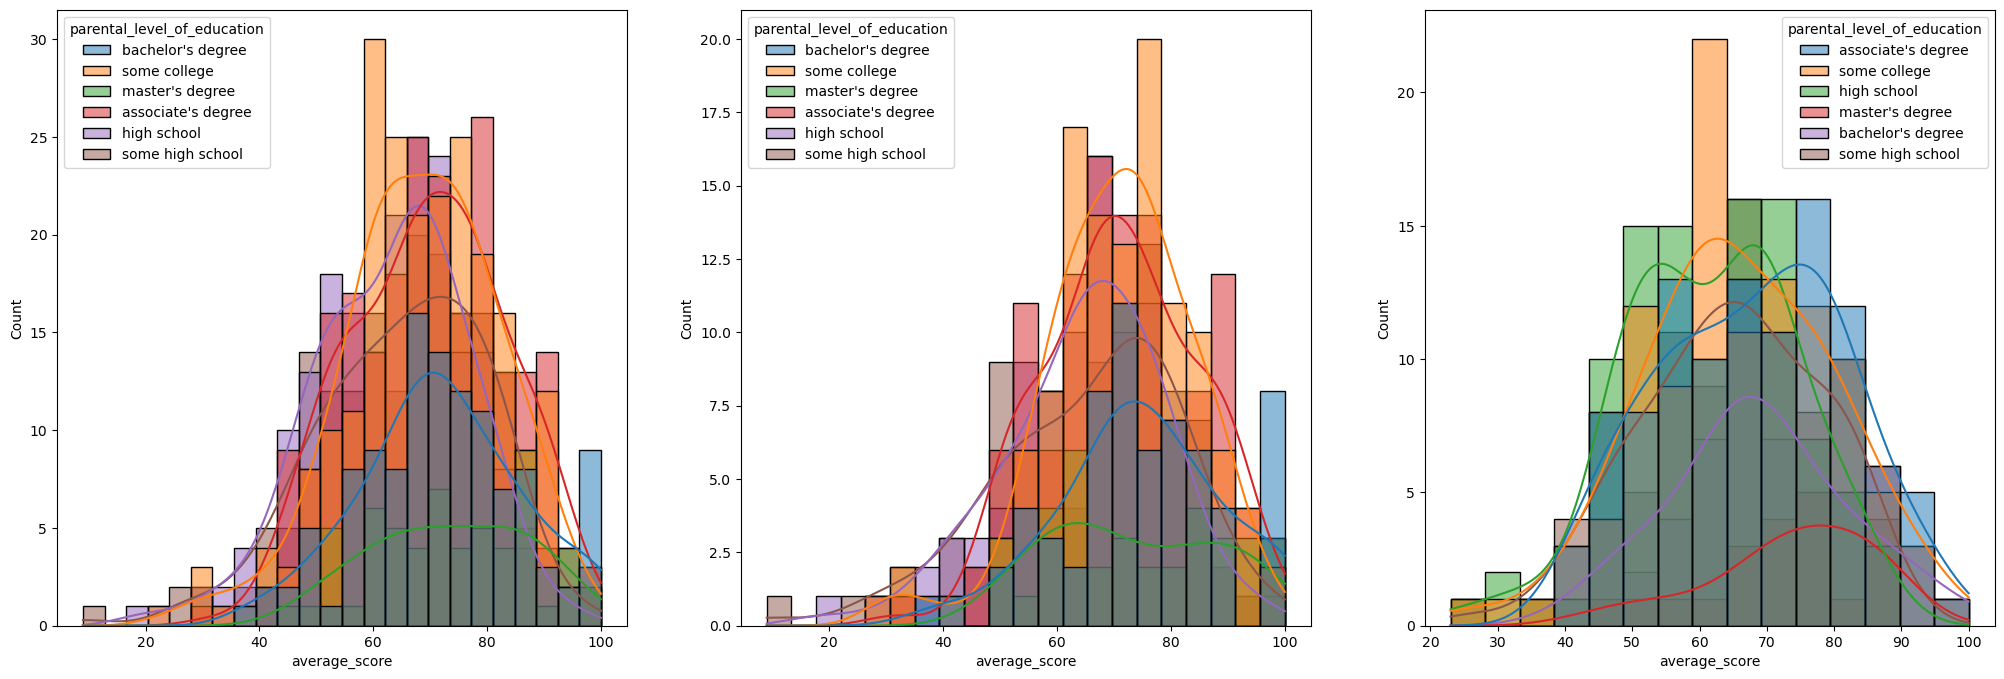

In [32]:
fig, axis= plt.subplots(1,3, figsize=(25,8))
plt.subplot(131)
ax= sns.histplot(x="average_score", data=df, kde=True, hue="parental_level_of_education")
plt.subplot(132)
ax= sns.histplot(x="average_score", data=df[df["gender"]=="female"], kde=True, hue="parental_level_of_education")
plt.subplot(133)
ax= sns.histplot(x="average_score", data=df[df["gender"]=="male"], kde=True, hue="parental_level_of_education")
plt.show()

#### Insights/observations-
- In general i.e. 1st plot, parent's eduaction level doesn't help student perform well in exam. The average score lies between 60-70
- 2nd plot shows that the parent's education level has no effect on female students performance. The average score lies between 60-70
- 3rd plot shows that the parents whose education level is masters or associate degree their male child tend to perform well in exam, with their avg. score lying between 70-80

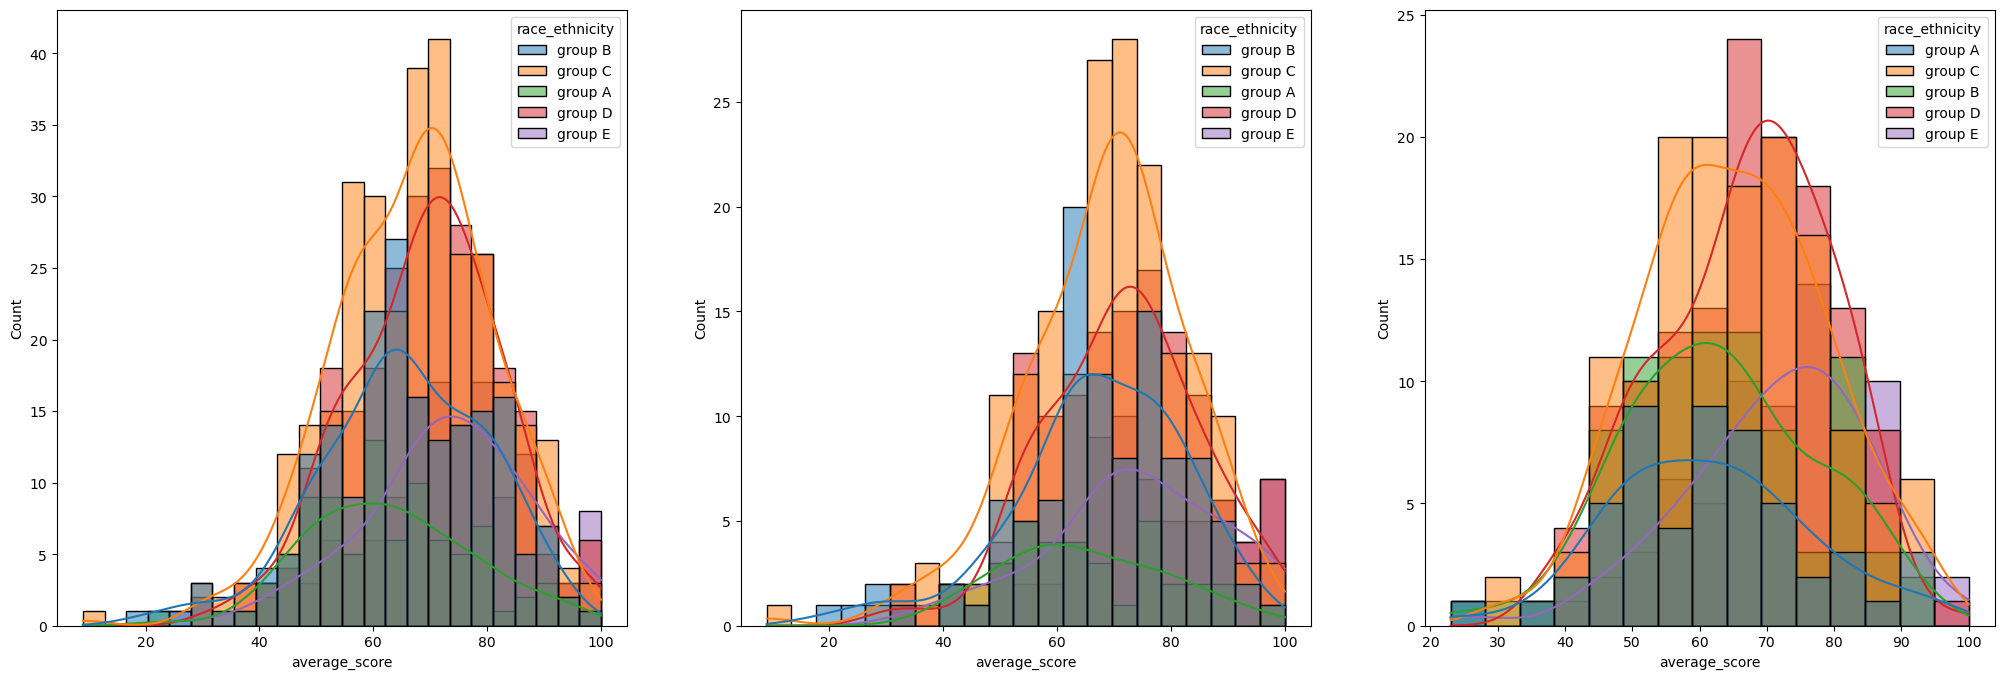

In [33]:
fig, axis= plt.subplots(1,3, figsize= (25,8))
plt.subplot(131)
sns.histplot(x="average_score", data=df, kde=True, hue="race_ethnicity")
plt.subplot(132)
sns.histplot(x="average_score", data=df[df["gender"]=="female"], kde=True, hue="race_ethnicity")
plt.subplot(133)
sns.histplot(x="average_score", data=df[df["gender"]=="male"], kde=True, hue="race_ethnicity")
plt.show()

#### Insights/observations-
- In 1st plot, generally the students of group A and B tend to perform poorly in exam.
- In 2nd and 3rd plot, the trend is same, so we conclude that students of Group A and B tend to perform poorly in exam irrespective of whether they are male or female.

<AxesSubplot: >

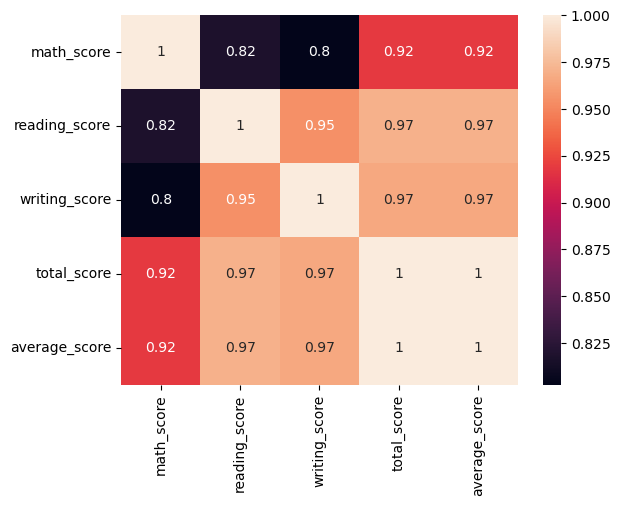

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
# correlation plot is obtained wrt numerical featueres and it shows high correlation.